In [13]:
import pandas as pd

In [14]:
import pandas as pd

df = pd.read_csv('tweets_para_treinamento.csv')

# --- NOVO: Tratamento de NaN diretamente no notebook de treinamento ---
print(f"Número de linhas antes da remoção de NaN: {len(df)}")

# Remove linhas onde 'texto_limpo' OU 'sentimento' são NaN
# Essas são as colunas que você usa para x e y
df.dropna(subset=['texto_limpo', 'sentimento'], inplace=True) 

print(f"Número de linhas após a remoção de NaN: {len(df)}")
# -------------------------------------------------------------------

df.head()

Número de linhas antes da remoção de NaN: 1000
Número de linhas após a remoção de NaN: 985


,texto_limpo,sentimento,Query
0,"Ok, estou ansioso.",Positivo,Palmeiras
1,que privilégio ter visto o endrick jogar no pa...,Positivo,Palmeiras
2,Meu trio,Positivo,Palmeiras
3,A torcida do Palmeiras está presente em qualqu...,Neutro,Palmeiras
4,Torcedores do porto no Instagram o Palmeiras n...,Neutro,Palmeiras


In [15]:
tweet_df = df[['texto_limpo', 'sentimento']]
tweet_df.head()

,texto_limpo,sentimento
0,"Ok, estou ansioso.",Positivo
1,que privilégio ter visto o endrick jogar no pa...,Positivo
2,Meu trio,Positivo
3,A torcida do Palmeiras está presente em qualqu...,Neutro
4,Torcedores do porto no Instagram o Palmeiras n...,Neutro


In [16]:
tweet_df['sentimento'].value_counts()

sentimento
Neutro      561
Positivo    228
Negativo    196
Name: count, dtype: int64

C:\Users\Murilo Fontana Muniz\AppData\Local\Temp\ipykernel_13424\3916151581.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=tweet_df.sentimento, palette='Set1')


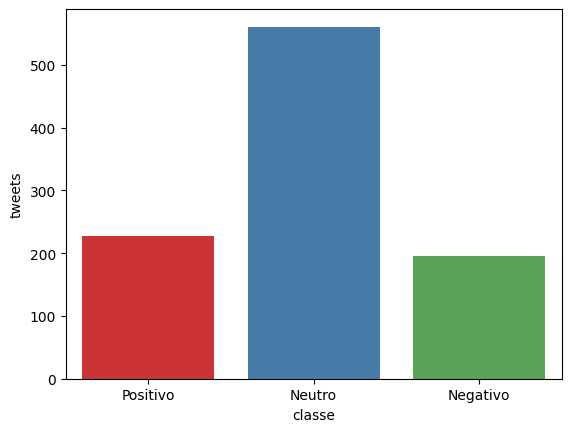

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=tweet_df.sentimento, palette='Set1')
plt.xlabel('classe')
plt.ylabel('tweets')
plt.show()

Lematização

In [18]:
%pip install -U pip steuptools wheel
%pip install -U spacy
!python -m spacy download pt_core_news_sm

  Using cached pip-25.1.1-py3-none-any.whl.metadata (3.6 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement steuptools (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for steuptools


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached https://github.com/explosion/spacy-models/releases/download/pt_core_news_sm-3.8.0/pt_core_news_sm-3.8.0-py3-none-any.whl (13.0 MB)
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import spacy

# Carregar o modelo de português do spaCy
try:
    nlp = spacy.load("pt_core_news_sm")
    print("✅ Modelo spaCy 'pt_core_news_sm' carregado para lematização.")
except OSError:
    print("❌ Erro: Modelo spaCy 'pt_core_news_sm' não encontrado.")
    print("Por favor, execute o comando: !python -m spacy download pt_core_news_sm")
    print("A lematização será desativada.")
    nlp = None # Define nlp como None se o modelo não puder ser carregado

# %% [markdown]
# ---
# 
# ### 3. Função de Lematização
# 
# Esta função pega uma string de texto e retorna sua versão lematizada. Ela garante que apenas tokens de palavras sejam lematizados, ignorando pontuações e espaços.

# %%
def lematizar_texto(texto: str) -> str:
    """
    Lematiza um texto usando o modelo de português do spaCy.
    Retorna as palavras lematizadas separadas por espaço.
    """
    if nlp is None or not isinstance(texto, str) or not texto.strip():
        # Retorna o texto original se o spaCy não estiver carregado,
        # ou se o texto não for uma string válida/estiver vazio.
        return texto 

    # Processa o texto com o modelo spaCy
    doc = nlp(texto)
    
    # Extrai o lema de cada token que não é pontuação ou espaço
    tokens_lematizados = [token.lemma_ for token in doc if not token.is_punct and not token.is_space]
    
    # Junta os lemas para formar o texto lematizado final
    return " ".join(tokens_lematizados)

print("Função 'lematizar_texto' criada com sucesso.")

# %% [markdown]
# ---
# 
# ### 4. Exemplo de Uso (Aplicação em um DataFrame Pandas)
# 
# Abaixo, um exemplo de como você aplicaria essa função a uma coluna de texto em um DataFrame Pandas. Assumimos que você já tem um DataFrame `df` com uma coluna de texto (por exemplo, `texto_limpo`).

# %%
import pandas as pd

# Exemplo de DataFrame (substitua pelo seu carregamento de dados real)
data = {'Texto': ['Correndo muito rápido pela rua.', 
                  'As meninas cantaram lindas músicas.', 
                  'Eu amo aprender sobre ciência de dados.',
                  'Eles foram ver o filme ontem.',
                  'Para de gritar!']}
df_exemplo = pd.DataFrame(data)

# Aplicar uma função de limpeza (simplificada para o exemplo)
import re
def limpar_texto_exemplo(texto: str) -> str:
    return re.sub(r'[^\w\s]', '', texto).lower().strip()

df_exemplo['texto_limpo'] = df_exemplo['Texto'].apply(limpar_texto_exemplo)

print("DataFrame de exemplo antes da lematização:")
print(df_exemplo)
print("-" * 50)

# Aplicar a lematização
if nlp is not None:
    print("\nAplicando lematização na coluna 'texto_limpo'...")
    df_exemplo['texto_lematizado'] = df_exemplo['texto_limpo'].apply(lematizar_texto)
    print("\nDataFrame de exemplo após a lematização:")
    print(df_exemplo)
else:
    print("\nLematização não pode ser aplicada pois o modelo spaCy não foi carregado.")

✅ Modelo spaCy 'pt_core_news_sm' carregado para lematização.
Função 'lematizar_texto' criada com sucesso.
DataFrame de exemplo antes da lematização:
                                     Texto  \
0          Correndo muito rápido pela rua.   
1      As meninas cantaram lindas músicas.   
2  Eu amo aprender sobre ciência de dados.   
3            Eles foram ver o filme ontem.   
4                          Para de gritar!   

                              texto_limpo  
0          correndo muito rápido pela rua  
1      as meninas cantaram lindas músicas  
2  eu amo aprender sobre ciência de dados  
3            eles foram ver o filme ontem  
4                          para de gritar  
--------------------------------------------------

Aplicando lematização na coluna 'texto_limpo'...

DataFrame de exemplo após a lematização:
                                     Texto  \
0          Correndo muito rápido pela rua.   
1      As meninas cantaram lindas músicas.   
2  Eu amo aprender sobre ciên

In [20]:
#equilibrando dados

sentimentos = []

sentimentos.append(tweet_df.loc[tweet_df['sentimento'] == "Neutro"]['sentimento'].count())
sentimentos.append(tweet_df.loc[tweet_df['sentimento'] == "Positivo"]['sentimento'].count())
sentimentos.append(tweet_df.loc[tweet_df['sentimento'] == "Negativo"]['sentimento'].count())


sentimentos

[np.int64(561), np.int64(228), np.int64(196)]

In [21]:
sentimentos.sort()
sentimentos

[np.int64(196), np.int64(228), np.int64(561)]

In [22]:
contagens_sentimento = tweet_df['sentimento'].value_counts()

# 2. Obter os DataFrames para cada sentimento, contendo apenas as colunas 'texto_limpo' e 'sentimento'
# Usamos .copy() para evitar SettingWithCopyWarning
df_positivo = tweet_df[tweet_df['sentimento'] == 'Positivo'][['texto_limpo', 'sentimento']].copy()
df_neutro = tweet_df[tweet_df['sentimento'] == 'Neutro'][['texto_limpo', 'sentimento']].copy()
df_negativo = tweet_df[tweet_df['sentimento'] == 'Negativo'][['texto_limpo', 'sentimento']].copy()

# 3. Criar uma lista de tuplas (contagem, nome do sentimento, DataFrame da classe)
# Usamos .get(classe, 0) caso uma classe não exista, para evitar KeyError,
# e pegamos o tamanho do DataFrame para a contagem.
lista_classes = [
    (len(df_positivo), 'Positivo', df_positivo),
    (len(df_neutro), 'Neutro', df_neutro),
    (len(df_negativo), 'Negativo', df_negativo)
]

# 4. Ordenar a lista pela contagem (primeiro elemento da tupla) em ordem crescente
lista_classes_ordenada = sorted(lista_classes, key=lambda x: x[0])

# 5. Atribuir os DataFrames às variáveis minoria, meio, maioria
# Acesso o terceiro elemento da tupla (índice 2), que é o DataFrame.
minoria = lista_classes_ordenada[0][2] # O DataFrame da classe minoritária
meio = lista_classes_ordenada[1][2]    # O DataFrame da classe intermediária
maioria = lista_classes_ordenada[2][2] # O DataFrame da classe majoritária

# 6. Imprimir as contagens no formato desejado
print(f"Maioria\n{maioria['sentimento'].count()}\n")
print(f"Meio\n{meio['sentimento'].count()}\n")
print(f"Minoria\n{minoria['sentimento'].count()}\n")

Maioria
561

Meio
228

Minoria
196



In [23]:
from sklearn.utils import resample

maior_menor = resample(maioria, replace=True, n_samples=len(minoria), random_state=123)
meio_menor = resample(meio, replace=True, n_samples=len(minoria), random_state=123)


In [24]:
tweet_df_equilibrado_over = pd.concat([minoria, meio_menor, maior_menor])

tweet_df_equilibrado_over = tweet_df_equilibrado_over.reset_index()

tweet_df_equilibrado_over.drop(columns=['index'], inplace=True)

tweet_df_equilibrado_over.groupby(['sentimento']).count()

,texto_limpo
sentimento,
Negativo,196
Neutro,196
Positivo,196


In [25]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.pipeline import Pipeline;


#vetorizadores
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#classificadores
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [27]:
from nltk.tokenize import TweetTokenizer

tweet_tokenizer = TweetTokenizer()

In [28]:
def escolhe_pipeline(pipe):
    match pipe:
        case 1:
            modelo1 = Pipeline([
                ('countVectorizer', CountVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
                ('modelo', LogisticRegression(solver='liblinear'))
            ])
            return modelo1
        case 2:
            modelo2 = Pipeline([
                ('TfidfVectorizer', TfidfVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
                ('modelo', LogisticRegression(solver='liblinear'))
            ])
            return modelo2
        case 3:
            modelo3 = Pipeline([
                ('countVectorizer', CountVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
                ('modelo', PassiveAggressiveClassifier())
            ])
            return modelo3
        case 4:
            modelo4 = Pipeline([
                ('TfidfVectorizer', TfidfVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
                ('modelo', PassiveAggressiveClassifier())
            ])
            return modelo4
        case 5:
            modelo5 = Pipeline([
                ('countVectorizer', CountVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
                ('modelo', RandomForestClassifier())
            ])
            return modelo5
        case 6:
            modelo6 = Pipeline([
                ('TfidfVectorizer', TfidfVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
                ('modelo', RandomForestClassifier())
            ])
            return modelo6
        case 7:
            modelo7 = Pipeline([
                ('countVectorizer', CountVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
                ('modelo', SGDClassifier(max_iter=1000))
            ])
            return modelo7
        case 8:
            modelo8 = Pipeline([
                ('TfidfVectorizer', TfidfVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
                ('modelo', SGDClassifier(max_iter=1000))
            ])
            return modelo8
        case 9:
            modelo9 = Pipeline([
                ('countVectorizer', CountVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
                ('modelo', SVC())
            ])
            return modelo9
        case 10:
            modelo10 = Pipeline([
                ('TfidfVectorizer', TfidfVectorizer(analyzer='word', tokenizer=tweet_tokenizer.tokenize)),
                ('modelo', SVC())
            ])
            return modelo10

In [29]:
%pip install mlxtend

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

def matriz_confusao(y_teste, modelo_predicao):
    print('Relatório de Classificação:\n', metrics.classification_report(y_teste, modelo_predicao))

    print("Acurácia: {:.4f}\n", format(accuracy_score(y_teste, modelo_predicao)))

    print("Matriz de Confusão:\n", pd.crosstab(y_teste, modelo_predicao, rownames=['Real'], colnames=['Predito'], margins=True), '')

    mc = confusion_matrix(y_target=y_teste, y_predicted=modelo_predicao, binary=False)

    fig, ax = plot_confusion_matrix(conf_mat=mc)
    plt.show()
    print('\n')


In [31]:
x = tweet_df_equilibrado_over['texto_limpo']
y = tweet_df_equilibrado_over['sentimento']

x.shape, y.shape

((588,), (588,))

In [32]:
#separar entre treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=123)

x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape

((411,), (177,), (411,), (177,))

d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


************************************************************************************************************************************
Modelo: Pipeline(steps=[('countVectorizer',
                 CountVectorizer(tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x000001F8CA186210>>)),
                ('modelo', LogisticRegression(solver='liblinear'))])

AVALIANDO MODELO

Relatório de Classificação:
               precision    recall  f1-score   support

    Negativo       0.65      0.59      0.62        54
      Neutro       0.61      0.69      0.65        59
    Positivo       0.67      0.64      0.66        64

    accuracy                           0.64       177
   macro avg       0.65      0.64      0.64       177
weighted avg       0.65      0.64      0.64       177

Acurácia: {:.4f}
 0.6440677966101694
Matriz de Confusão:
 Predito   Negativo  Neutro  Positivo  All
Real                                     
Negativo        32      14  

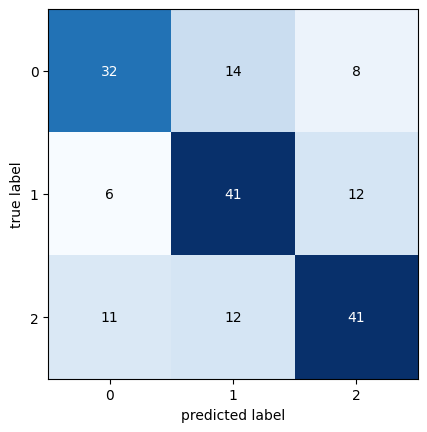

d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(





VALIDAÇÃO CRUZADA



d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnin

************************************************************************************************************************************
Modelo: Pipeline(steps=[('TfidfVectorizer',
                 TfidfVectorizer(tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x000001F8CA186210>>)),
                ('modelo', LogisticRegression(solver='liblinear'))])

AVALIANDO MODELO

Relatório de Classificação:
               precision    recall  f1-score   support

    Negativo       0.60      0.76      0.67        54
      Neutro       0.67      0.68      0.67        59
    Positivo       0.76      0.58      0.65        64

    accuracy                           0.67       177
   macro avg       0.67      0.67      0.67       177
weighted avg       0.68      0.67      0.67       177

Acurácia: {:.4f}
 0.6666666666666666
Matriz de Confusão:
 Predito   Negativo  Neutro  Positivo  All
Real                                     
Negativo        41       9  

d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


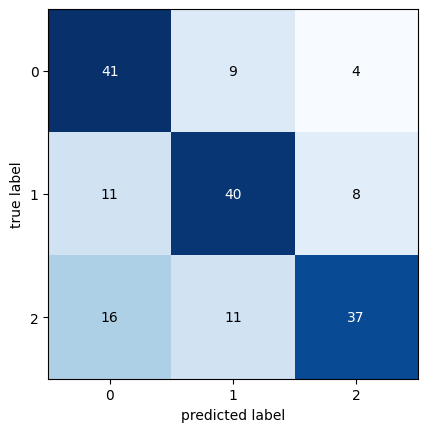

d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(





VALIDAÇÃO CRUZADA



d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnin

************************************************************************************************************************************
Modelo: Pipeline(steps=[('countVectorizer',
                 CountVectorizer(tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x000001F8CA186210>>)),
                ('modelo', PassiveAggressiveClassifier())])

AVALIANDO MODELO

Relatório de Classificação:
               precision    recall  f1-score   support

    Negativo       0.60      0.59      0.60        54
      Neutro       0.63      0.64      0.64        59
    Positivo       0.64      0.64      0.64        64

    accuracy                           0.63       177
   macro avg       0.63      0.63      0.63       177
weighted avg       0.63      0.63      0.63       177

Acurácia: {:.4f}
 0.6271186440677966
Matriz de Confusão:
 Predito   Negativo  Neutro  Positivo  All
Real                                     
Negativo        32      11        11 

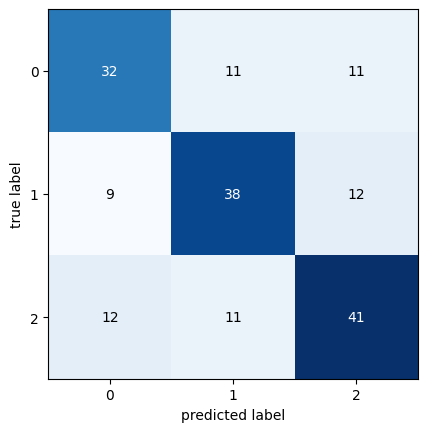




VALIDAÇÃO CRUZADA



d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token

************************************************************************************************************************************
Modelo: Pipeline(steps=[('TfidfVectorizer',
                 TfidfVectorizer(tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x000001F8CA186210>>)),
                ('modelo', PassiveAggressiveClassifier())])

AVALIANDO MODELO

Relatório de Classificação:
               precision    recall  f1-score   support

    Negativo       0.63      0.67      0.65        54
      Neutro       0.67      0.69      0.68        59
    Positivo       0.68      0.62      0.65        64

    accuracy                           0.66       177
   macro avg       0.66      0.66      0.66       177
weighted avg       0.66      0.66      0.66       177

Acurácia: {:.4f}
 0.6610169491525424
Matriz de Confusão:
 Predito   Negativo  Neutro  Positivo  All
Real                                     
Negativo        36       8        10 

d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


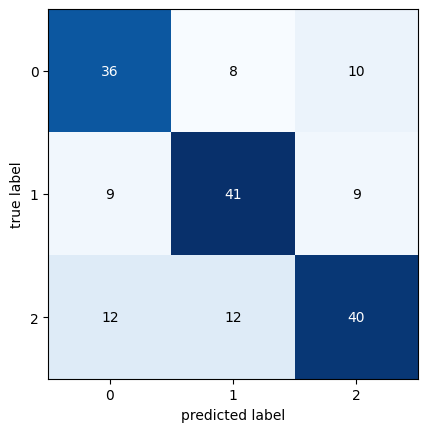

d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(





VALIDAÇÃO CRUZADA



d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token

************************************************************************************************************************************
Modelo: Pipeline(steps=[('countVectorizer',
                 CountVectorizer(tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x000001F8CA186210>>)),
                ('modelo', RandomForestClassifier())])

AVALIANDO MODELO

Relatório de Classificação:
               precision    recall  f1-score   support

    Negativo       0.60      0.67      0.63        54
      Neutro       0.59      0.66      0.62        59
    Positivo       0.73      0.58      0.64        64

    accuracy                           0.63       177
   macro avg       0.64      0.64      0.63       177
weighted avg       0.64      0.63      0.63       177

Acurácia: {:.4f}
 0.632768361581921
Matriz de Confusão:
 Predito   Negativo  Neutro  Positivo  All
Real                                     
Negativo        36      13         5   54
N

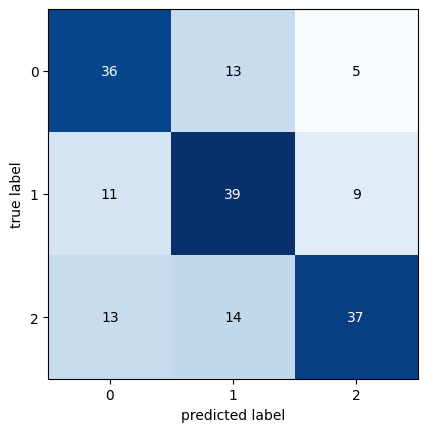




VALIDAÇÃO CRUZADA



d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token

************************************************************************************************************************************
Modelo: Pipeline(steps=[('TfidfVectorizer',
                 TfidfVectorizer(tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x000001F8CA186210>>)),
                ('modelo', RandomForestClassifier())])

AVALIANDO MODELO

Relatório de Classificação:
               precision    recall  f1-score   support

    Negativo       0.61      0.61      0.61        54
      Neutro       0.59      0.68      0.63        59
    Positivo       0.69      0.59      0.64        64

    accuracy                           0.63       177
   macro avg       0.63      0.63      0.63       177
weighted avg       0.63      0.63      0.63       177

Acurácia: {:.4f}
 0.6271186440677966
Matriz de Confusão:
 Predito   Negativo  Neutro  Positivo  All
Real                                     
Negativo        33      16         5   54


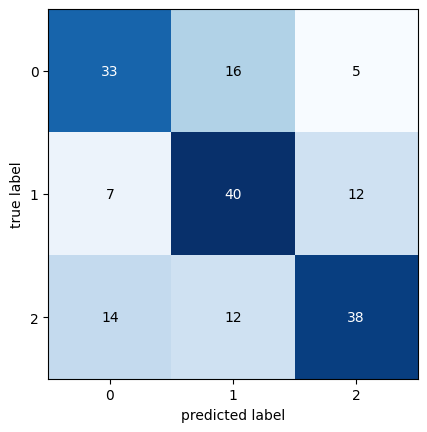




VALIDAÇÃO CRUZADA



d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token

************************************************************************************************************************************
Modelo: Pipeline(steps=[('countVectorizer',
                 CountVectorizer(tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x000001F8CA186210>>)),
                ('modelo', SGDClassifier())])

AVALIANDO MODELO

Relatório de Classificação:
               precision    recall  f1-score   support

    Negativo       0.64      0.65      0.64        54
      Neutro       0.60      0.64      0.62        59
    Positivo       0.68      0.62      0.65        64

    accuracy                           0.64       177
   macro avg       0.64      0.64      0.64       177
weighted avg       0.64      0.64      0.64       177

Acurácia: {:.4f}
 0.6384180790960452
Matriz de Confusão:
 Predito   Negativo  Neutro  Positivo  All
Real                                     
Negativo        35      12         7   54
Neutro   

d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


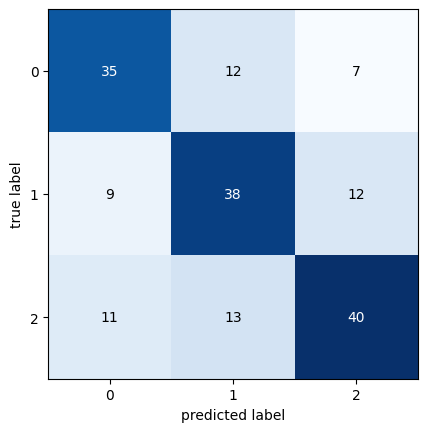

d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(





VALIDAÇÃO CRUZADA



d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token

************************************************************************************************************************************
Modelo: Pipeline(steps=[('TfidfVectorizer',
                 TfidfVectorizer(tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x000001F8CA186210>>)),
                ('modelo', SGDClassifier())])

AVALIANDO MODELO

Relatório de Classificação:
               precision    recall  f1-score   support

    Negativo       0.64      0.80      0.71        54
      Neutro       0.74      0.63      0.68        59
    Positivo       0.68      0.64      0.66        64

    accuracy                           0.68       177
   macro avg       0.69      0.69      0.68       177
weighted avg       0.69      0.68      0.68       177

Acurácia: {:.4f}
 0.6836158192090396
Matriz de Confusão:
 Predito   Negativo  Neutro  Positivo  All
Real                                     
Negativo        43       4         7   54
Neutro   

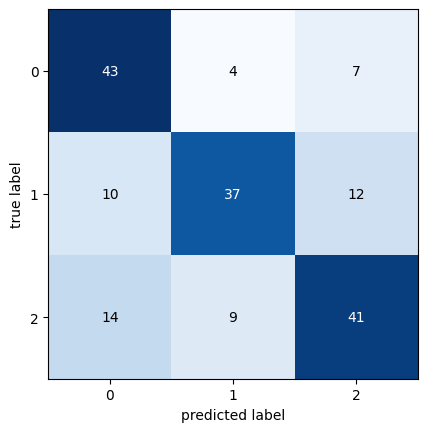




VALIDAÇÃO CRUZADA



d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token

************************************************************************************************************************************
Modelo: Pipeline(steps=[('countVectorizer',
                 CountVectorizer(tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x000001F8CA186210>>)),
                ('modelo', SVC())])

AVALIANDO MODELO

Relatório de Classificação:
               precision    recall  f1-score   support

    Negativo       0.58      0.57      0.58        54
      Neutro       0.58      0.64      0.61        59
    Positivo       0.64      0.59      0.62        64

    accuracy                           0.60       177
   macro avg       0.60      0.60      0.60       177
weighted avg       0.61      0.60      0.60       177

Acurácia: {:.4f}
 0.6045197740112994
Matriz de Confusão:
 Predito   Negativo  Neutro  Positivo  All
Real                                     
Negativo        31      15         8   54
Neutro           8 

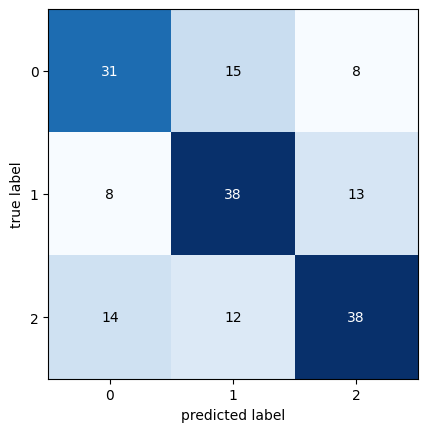




VALIDAÇÃO CRUZADA



d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token

************************************************************************************************************************************
Modelo: Pipeline(steps=[('TfidfVectorizer',
                 TfidfVectorizer(tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x000001F8CA186210>>)),
                ('modelo', SVC())])

AVALIANDO MODELO

Relatório de Classificação:
               precision    recall  f1-score   support

    Negativo       0.58      0.85      0.69        54
      Neutro       0.69      0.64      0.67        59
    Positivo       0.81      0.55      0.65        64

    accuracy                           0.67       177
   macro avg       0.70      0.68      0.67       177
weighted avg       0.70      0.67      0.67       177

Acurácia: {:.4f}
 0.672316384180791
Matriz de Confusão:
 Predito   Negativo  Neutro  Positivo  All
Real                                     
Negativo        46       6         2   54
Neutro          15  

d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


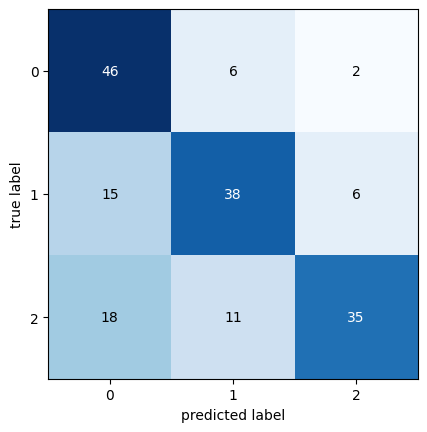

d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(





VALIDAÇÃO CRUZADA



d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\Docs\Faculdade\7o periodo\SI\projeto\cod\venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token

In [33]:
relatorios=[]
modelos=[]

for i in range(1, 11):
    tipo_modelo = escolhe_pipeline(i)
    nome = str(tipo_modelo)
    modelo = tipo_modelo.fit(x_treino, y_treino)
    modelo_pred = modelo.predict(x_teste)

    relatorios.append(metrics.classification_report(y_teste, modelo_pred, output_dict=True))
    modelos.append(nome)

    print("*"*132)
    print(f'Modelo: {nome}\n')
    print("AVALIANDO MODELO\n")
    matriz_confusao(y_teste, modelo_pred)

    print("\nVALIDAÇÃO CRUZADA\n")
    validacao_cruzada = cross_val_predict(modelo, x, y, cv=10)



In [34]:
colunas = ['modelo', 'f1_score', 'accuracy_score']
relatorio_df = pd.DataFrame(columns=colunas)

In [35]:
for i in range(len(relatorios)):
    relatorio_df.loc[i] = [modelos[i], round(relatorios[i]['weighted avg']['f1-score'], 2), round(relatorios[i]['accuracy'], 2)]

In [36]:
def formatar_nome_modelo(modelo):
    vec = modelo[18:33]

    ini_nome = (modelo.rfind('modelo')+9)
    fim_nome = (modelo.rfind('('))

    classif = modelo[ini_nome: fim_nome]
    return(f'{classif} - {vec}')

In [37]:
relatorio_df['modelo'] = relatorio_df['modelo'].apply(formatar_nome_modelo)
relatorio_df.sort_values(by='f1_score', ascending=False)

,modelo,f1_score,accuracy_score
7,SGDClassifier - TfidfVectorizer,0.68,0.68
1,LogisticRegression - TfidfVectorizer,0.67,0.67
9,SVC - TfidfVectorizer,0.67,0.67
3,PassiveAggressiveClassifier - TfidfVectorizer,0.66,0.66
0,LogisticRegression - countVectorizer,0.64,0.64
6,SGDClassifier - countVectorizer,0.64,0.64
5,RandomForestClassifier - TfidfVectorizer,0.63,0.63
4,RandomForestClassifier - countVectorizer,0.63,0.63
2,PassiveAggressiveClassifier - countVectorizer,0.63,0.63
8,SVC - countVectorizer,0.60,0.60
